Tensorflow Version =  1.14.0
Model Parameters - 
 Neurons in HL =  128 
Epochs = 1
Dataset check...


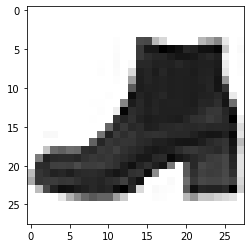

Dataset check after normalization...


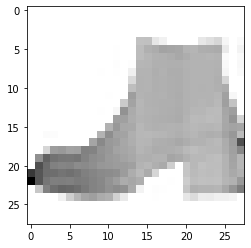

Train_set_size: 3000
Model_1: 2 Hidden Layers, Activation= Relu
Running Training...
3000/3000 [==============================] - 1s 354us/sample - loss: 0.6178 - acc: 0.7683
{'loss': [0.6177743473052979], 'acc': [0.7683333]}
train_error= 0.2316666841506958
Running Test...
57000/57000 [==============================] - 14s 248us/sample - loss: 0.5653 - acc: 0.7834
loss =  0.5652795112927754
Acc =  0.7833509
Err =  0.2166491150856018


Model_2: 2 Hidden Layers, Activation= sigmoid
Running Training...
3000/3000 [==============================] - 1s 270us/sample - loss: 1.2075 - acc: 0.6023
{'loss': [1.2074783879915874], 'acc': [0.6023333]}
train_error= 0.39766669273376465
Running Test...
57000/57000 [==============================] - 10s 172us/sample - loss: 1.0106 - acc: 0.6395
loss =  1.0106399647896749
Acc =  0.6394912
Err =  0.3605087995529175


Model_3: 2 Hidden Layers, Activation= tanh
Running Training...
3000/3000 [==============================] - 1s 329us/sample - loss: 0.6050 - 

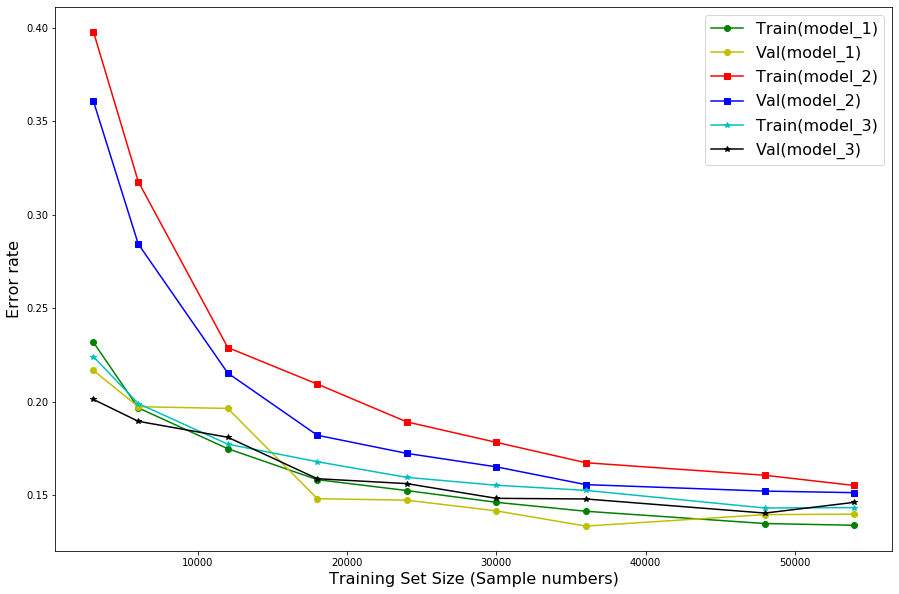

In [20]:
# EE258 Neural Networks 
# Project 1 - Classification of Fashion MNIST Dataset
# Author - Siddhesh Gaiki and Hemanta Ingle 
# Instructor - Birsen Sirkeci
# San Jose State University, CA

# This project is done using some modules from Tensorflow and Keras. All due credits given to -
# Keras - https://keras.io
# Tensorflow - https://www.tensorflow.org
# Zilando - https://github.com/zalandoresearch/fashion-mnist

##################################################################################################
# Importing required libraries-
import tensorflow.keras as keras
import tensorflow as tf
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

print("Tensorflow Version = ", tf.__version__) # Prints Tensorflow Version being used.

mnist = tf.keras.datasets.fashion_mnist # Import the Fashion MNIST dataset.
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Model Parameters - 
hl_neurons=128
n_epochs=1
print ("Model Parameters - \n Neurons in HL = ",hl_neurons,"\nEpochs =", n_epochs)
#print(x_train[122]) # Check the dataset. Opening a random entry.

import matplotlib.pyplot as plt
print ("Dataset check...")
plt.imshow(x_train[122],cmap=plt.cm.binary)
plt.show()

# This dataset has inputs having vaues from 0 to 255. These need to be normalized.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#print(x_train[122]) # Check the same sample after normalization.
print ("Dataset check after normalization...")
plt.imshow(x_train[122],cmap=plt.cm.binary)
plt.show()
loss_arr = []
acc_arr = []
Train_size_list = []
Train_error_list1 = []
Val_error_list1 = []
Train_error_list2 = []
Val_error_list2 = []
Train_error_list3 = []
Val_error_list3 = []

Train_time_list = []
Val_time_list = []

#for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001]:
for j in [ 0.95, 0.9,0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1]:

    x_train_partial, x_test_partial, y_train_partial, y_test_partial  = sklearn.model_selection.train_test_split(x_train, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list.append(y_train_partial.shape[0])

    print ("Model_1: 2 Hidden Layers, Activation= Relu")
    model1 = tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Flatten())
    model1.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print ("Running Training...")
    
    model1.fit(x_train_partial, y_train_partial, epochs=n_epochs)
    history_callback = model1.fit(x_train_partial, y_train_partial, epochs=n_epochs)
    train_acc = history_callback.history["acc"]
    print (history_callback.history)
    train_error= 1-train_acc[n_epochs-1]
    print ("train_error=",train_error)
    Train_error_list1.append(train_error)
    print ("Running Test...")
    val_loss, val_acc = model1.evaluate(x_test_partial, y_test_partial)
    Val_error_list1.append(1-val_acc)
    print("loss = ",val_loss)
    print("Acc = ",val_acc)
    print("Err = ",1-val_acc)
    print ("\n")
    
    print ("Model_2: 2 Hidden Layers, Activation= sigmoid")
    model2 = tf.keras.models.Sequential()
    model2.add(tf.keras.layers.Flatten())
    model2.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.sigmoid))
    model2.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.sigmoid))
    model2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print ("Running Training...")
    
    model2.fit(x_train_partial, y_train_partial, epochs=n_epochs)
    history_callback = model2.fit(x_train_partial, y_train_partial, epochs=n_epochs)
    train_acc = history_callback.history["acc"]
    print (history_callback.history)
    train_error= 1-train_acc[n_epochs-1]
    print ("train_error=",train_error)
    Train_error_list2.append(train_error)
    print ("Running Test...")
    val_loss, val_acc = model2.evaluate(x_test_partial, y_test_partial)
    Val_error_list2.append(1-val_acc)
    print("loss = ",val_loss)
    print("Acc = ",val_acc)
    print("Err = ",1-val_acc)
    print ("\n")
    

    print ("Model_3: 2 Hidden Layers, Activation= tanh")
    model3 = tf.keras.models.Sequential()
    model3.add(tf.keras.layers.Flatten())
    model3.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.tanh))
    model3.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.tanh))
    model3.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print ("Running Training...")
    
    model3.fit(x_train_partial, y_train_partial, epochs=n_epochs)
    history_callback = model3.fit(x_train_partial, y_train_partial, epochs=n_epochs)
    train_acc = history_callback.history["acc"]
    print (history_callback.history)
    train_error= 1-train_acc[n_epochs-1]
    print ("train_error=",train_error)
    Train_error_list3.append(train_error)
    print ("Running Test...")
    val_loss, val_acc = model3.evaluate(x_test_partial, y_test_partial)
    Val_error_list3.append(1-val_acc)
    print("loss = ",val_loss)
    print("Acc = ",val_acc)
    print("Err = ",1-val_acc)
    print ("\n")
    
plt.figure(figsize = (15,10))
plt.plot(Train_size_list, Train_error_list1, 'go-', label = "Train(model_1)")
plt.plot(Train_size_list, Val_error_list1, 'yo-', label = "Val(model_1)")
plt.plot(Train_size_list, Train_error_list2, 'rs-', label = "Train(model_2)")
plt.plot(Train_size_list, Val_error_list2, 'bs-', label = "Val(model_2)")
plt.plot(Train_size_list, Train_error_list3, 'c*-', label = "Train(model_3)")
plt.plot(Train_size_list, Val_error_list3, 'k*-', label = "Val(model_3)")
 

plt.xlabel('Training Set Size (Sample numbers)',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)

In [4]:
predictions = model1.predict_classes(x_test) # predictions 

In [5]:
print(predictions)

[9 2 1 ... 8 1 7]


In [6]:
predictions.shape

(10000,)

In [7]:
import tensorflow as tf # deep learning library. Tensors are just multi-dimensional arrays

import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sn
import pandas as pd
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten


# Aditional Libs
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


con_mat1 = tf.math.confusion_matrix(labels=y_test, predictions=predictions).numpy()

print('----------------Confusion Matrix for Model_1----------------')
print(con_mat1)

----------------Confusion Matrix for Model_1----------------
[[501   6  12 110   7   0 338   0  26   0]
 [  0 916  13  51   9   0   9   0   2   0]
 [  3   0 573   8 234   0 179   0   3   0]
 [  3  11   9 862  68   0  45   0   2   0]
 [  0   3  84  33 801   0  74   0   5   0]
 [  0   0   0   1   0 711   0 163  17 108]
 [ 42   5  88  74 236   0 529   0  26   0]
 [  0   0   0   0   0   7   0 933   2  58]
 [  1   2   2  21   4   0  32   4 931   3]
 [  0   0   0   0   0   1   0  82   2 915]]
